In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch

df = pd.read_csv('UpdatedMatches.csv')
data = []

C:\Users\herath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

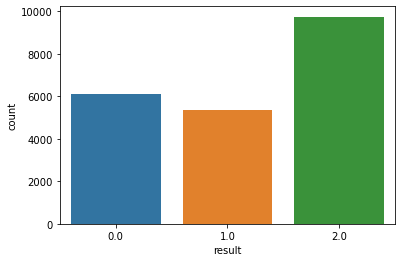

In [5]:
df['season'].replace({'2008/2009':2008, '2009/2010':2009, '2010/2011':2010, '2011/2012':2011, '2012/2013':2012, '2013/2014':2013, '2014/2015':2014, '2015/2016':2015 },inplace=True)

df["result"] = np.nan
for index, row in df.iterrows():
    if df.loc[index,'home_team_goal'] == df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 1
    if df.loc[index,'home_team_goal'] > df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 2
    if df.loc[index,'home_team_goal'] < df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 0
        
sns.countplot(df.result)


In [6]:
df.result.value_counts()/df.shape[0]

2.0    0.459098
0.0    0.288525
1.0    0.252377
Name: result, dtype: float64

In [7]:
from tqdm import tqdm

def teamfunction( df ):
    for index, row in tqdm(df.iterrows()):
        
        home_team = []
        home_team.append(df.loc[index,'buildUpPlaySpeed_home_team'])
        home_team.append(df.loc[index,'buildUpPlayDribbling_home_team'])
        home_team.append(df.loc[index,'buildUpPlayPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationPassing_home_team'])
        home_team.append(df.loc[index,'chanceCreationCrossing_home_team'])
        home_team.append(df.loc[index,'chanceCreationShooting_home_team'])
        home_team.append(df.loc[index,'defencePressure_home_team'])
        home_team.append(df.loc[index,'defenceAggression_home_team'])
        home_team.append(df.loc[index,'defenceTeamWidth_home_team'])


        away_team = []
        away_team.append(df.loc[index,'buildUpPlaySpeed_away_team'])
        away_team.append(df.loc[index,'buildUpPlayDribbling_away_team'])
        away_team.append(df.loc[index,'buildUpPlayPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationPassing_away_team'])
        away_team.append(df.loc[index,'chanceCreationCrossing_away_team'])
        away_team.append(df.loc[index,'chanceCreationShooting_away_team'])
        away_team.append(df.loc[index,'defencePressure_away_team'])
        away_team.append(df.loc[index,'defenceAggression_away_team'])
        away_team.append(df.loc[index,'defenceTeamWidth_away_team'])


        team_matrix = []
        for i in range(9):          
            m =[]
            for j in range(9):
                m.append(home_team[i]-away_team[j])
            team_matrix.append(m)

        team_details.append(team_matrix)


In [8]:
X = df.drop(['result','date', 'home_team_goal','away_team_goal'], axis=1)
y = df[['result']]
RANDOM_SEED =42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [9]:
y_train.result.value_counts()/y_train.shape[0]

2.0    0.458637
0.0    0.290715
1.0    0.250647
Name: result, dtype: float64

In [10]:
team_details = []
teamfunction( X_train )
team_train_data = team_details
Team_Train = torch.Tensor(np.array(team_train_data))

16996it [00:23, 731.80it/s]


In [11]:
Team_Train.size()

torch.Size([16996, 9, 9])

In [12]:
Team_Train.type()

'torch.FloatTensor'

In [13]:
team_details = []
teamfunction( X_test )
team_test_data = team_details
Team_Test = torch.Tensor(np.array(team_test_data))

4250it [00:07, 591.23it/s]


In [14]:
Team_Test.size()

torch.Size([4250, 9, 9])

In [15]:
Team_Test.type()

'torch.FloatTensor'

In [16]:
y_train = torch.squeeze(torch.LongTensor(np.array(y_train)))

In [17]:
y_train.size()

torch.Size([16996])

In [18]:
y_train.type()

'torch.LongTensor'

In [19]:
y_test = torch.squeeze(torch.LongTensor(np.array(y_test)))

In [20]:
y_test.size()

torch.Size([4250])

In [21]:
y_test.type()

'torch.LongTensor'

In [22]:
Team_Train = torch.flatten(Team_Train, start_dim=1)
Team_Test = torch.flatten(Team_Test, start_dim=1)

In [23]:
Team_Train.size()

torch.Size([16996, 81])

In [24]:
Team_Test.size()

torch.Size([4250, 81])

In [25]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Team_Train, y_train)
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

test = data_utils.TensorDataset(Team_Test, y_test)
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [26]:
import torch
from torch import nn, optim
import torch.nn.functional as F

#building neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(81,27)
        self.fc2 = nn.Linear(27,9)
        self.fc3 = nn.Linear(9,3)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [27]:
model = Net()

In [28]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [29]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Team_Train = Team_Train.to(device)
Team_Test = Team_Test.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

model = model.to(device)
criterion = criterion.to(device)

In [30]:
epochs = 200
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader):

        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(Team_Train)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    model.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader):
        pred = model(x)
        loss = criterion(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy_val = total / len(Team_Test)
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
        print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/200   Training loss: 1.1814   Testing loss: 1.0883   Train accuracy: 0.3853   Test accuracy: 0.4078  
Epoch: 1/200   Training loss: 1.1153   Testing loss: 1.0838   Train accuracy: 0.3804   Test accuracy: 0.4212  
Epoch: 2/200   Training loss: 1.0991   Testing loss: 1.0786   Train accuracy: 0.3950   Test accuracy: 0.4313  
Epoch: 3/200   Training loss: 1.0929   Testing loss: 1.0753   Train accuracy: 0.4057   Test accuracy: 0.4386  
Epoch: 4/200   Training loss: 1.0866   Testing loss: 1.0725   Train accuracy: 0.4112   Test accuracy: 0.4440  
Epoch: 5/200   Training loss: 1.0865   Testing loss: 1.0705   Train accuracy: 0.4193   Test accuracy: 0.4438  
Epoch: 6/200   Training loss: 1.0845   Testing loss: 1.0701   Train accuracy: 0.4205   Test accuracy: 0.4494  
Epoch: 7/200   Training loss: 1.0823   Testing loss: 1.0680   Train accuracy: 0.4245   Test accuracy: 0.4520  
Epoch: 8/200   Training loss: 1.0815   Testing loss: 1.0672   Train accuracy: 0.4232   Test accuracy: 0.4529  
E

Epoch: 74/200   Training loss: 1.0613   Testing loss: 1.0577   Train accuracy: 0.4586   Test accuracy: 0.4605  
Epoch: 75/200   Training loss: 1.0622   Testing loss: 1.0603   Train accuracy: 0.4593   Test accuracy: 0.4605  
Epoch: 76/200   Training loss: 1.0616   Testing loss: 1.0590   Train accuracy: 0.4600   Test accuracy: 0.4605  
Epoch: 77/200   Training loss: 1.0611   Testing loss: 1.0603   Train accuracy: 0.4580   Test accuracy: 0.4605  
Epoch: 78/200   Training loss: 1.0620   Testing loss: 1.0601   Train accuracy: 0.4563   Test accuracy: 0.4605  
Epoch: 79/200   Training loss: 1.0615   Testing loss: 1.0591   Train accuracy: 0.4585   Test accuracy: 0.4605  
Epoch: 80/200   Training loss: 1.0622   Testing loss: 1.0587   Train accuracy: 0.4565   Test accuracy: 0.4605  
Epoch: 81/200   Training loss: 1.0629   Testing loss: 1.0590   Train accuracy: 0.4567   Test accuracy: 0.4605  
Epoch: 82/200   Training loss: 1.0617   Testing loss: 1.0581   Train accuracy: 0.4570   Test accuracy: 0

Epoch: 147/200   Training loss: 1.0587   Testing loss: 1.0574   Train accuracy: 0.4587   Test accuracy: 0.4607  
Epoch: 148/200   Training loss: 1.0585   Testing loss: 1.0577   Train accuracy: 0.4576   Test accuracy: 0.4607  
Epoch: 149/200   Training loss: 1.0598   Testing loss: 1.0582   Train accuracy: 0.4588   Test accuracy: 0.4607  
Epoch: 150/200   Training loss: 1.0584   Testing loss: 1.0566   Train accuracy: 0.4587   Test accuracy: 0.4607  
Epoch: 151/200   Training loss: 1.0587   Testing loss: 1.0591   Train accuracy: 0.4579   Test accuracy: 0.4607  
Epoch: 152/200   Training loss: 1.0574   Testing loss: 1.0572   Train accuracy: 0.4590   Test accuracy: 0.4607  
Epoch: 153/200   Training loss: 1.0587   Testing loss: 1.0587   Train accuracy: 0.4589   Test accuracy: 0.4607  
Epoch: 154/200   Training loss: 1.0586   Testing loss: 1.0576   Train accuracy: 0.4605   Test accuracy: 0.4607  
Epoch: 155/200   Training loss: 1.0571   Testing loss: 1.0581   Train accuracy: 0.4597   Test ac

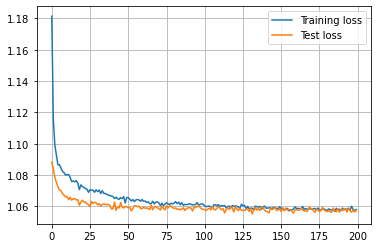

In [31]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

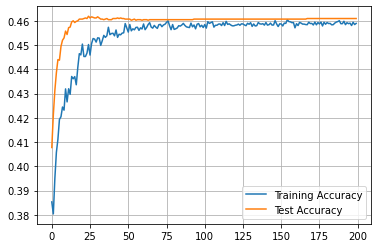

In [32]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [33]:
#saving the model

MODEL_PATH = 'teammodel.pth'
torch.save(model, MODEL_PATH)

In [34]:
model = torch.load(MODEL_PATH)

In [35]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = model(Team_Test)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

In [36]:
print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.50      0.00      0.00      1189
        Draw       0.00      0.00      0.00      1102
         Win       0.46      1.00      0.63      1959

    accuracy                           0.46      4250
   macro avg       0.32      0.33      0.21      4250
weighted avg       0.35      0.46      0.29      4250



C:\Users\herath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted label')

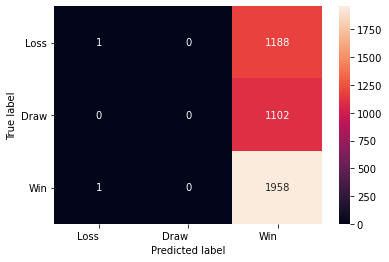

In [37]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [130]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader):
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 46 %


In [38]:
Team_Train1 = Team_Train.unsqueeze(1)
Team_Train1.size()

torch.Size([16996, 1, 81])

In [39]:
Team_Test1 = Team_Test.unsqueeze(1)
Team_Test1.size()

torch.Size([4250, 1, 81])

In [48]:
import torch.utils.data as data_utils

train1 = data_utils.TensorDataset(Team_Train1, y_train)
train_loader1 = data_utils.DataLoader(train1, batch_size=128, shuffle=True)


test1 = data_utils.TensorDataset(Team_Test1, y_test)
test_loader1 = data_utils.DataLoader(test1, batch_size=128, shuffle=True)

In [47]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=1 because our input is a grayscale image
                nn.Conv1d(in_channels=1, out_channels=4, kernel_size=3, padding=0, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=2),
          
                # output of our second conv layer
                nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3, padding=0, stride=1),
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=2),
                nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=0, stride=1),
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=2)
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 3*3 is derived by the formular 
                # which is the output of each convolutional layer
                nn.Linear(in_features=16*8, out_features=81),          
                nn.ReLU(),
                nn.Linear(in_features=81, out_features=27),
                nn.ReLU(),
                nn.Linear(in_features=27, out_features=9),
                nn.ReLU(),
                nn.Linear(in_features=9, out_features=3) # The output is 3 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

In [49]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Network()
net.to(device)

#Training
optimizer1 = optim.SGD(net.parameters(), lr=0.005)
criterion1 = nn.CrossEntropyLoss()


In [50]:
epochs = 100
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    net.train()
    
    total = 0
    # training our model
    for idx, (x, y) in enumerate(train_loader1):

        optimizer1.zero_grad()

        pred = net(x)
        loss = criterion1(pred, y)
        total_train_loss += loss.item()
        loss.backward(retain_graph=True)
        optimizer1.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(Team_Train1)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    net.eval()
    total = 0
    for idx, (x, y) in enumerate(test_loader1):
        pred = net(x)
        loss = criterion1(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy_val = total / len(Team_Test1)
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
          print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/100   Training loss: 1.1004   Testing loss: 1.0831   Train accuracy: 0.3079   Test accuracy: 0.4136  
Epoch: 1/100   Training loss: 1.0718   Testing loss: 1.0671   Train accuracy: 0.4517   Test accuracy: 0.4609  
Epoch: 2/100   Training loss: 1.0645   Testing loss: 1.0629   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 3/100   Training loss: 1.0634   Testing loss: 1.0632   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 4/100   Training loss: 1.0630   Testing loss: 1.0622   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 5/100   Training loss: 1.0627   Testing loss: 1.0619   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 6/100   Training loss: 1.0623   Testing loss: 1.0627   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 7/100   Training loss: 1.0620   Testing loss: 1.0620   Train accuracy: 0.4586   Test accuracy: 0.4609  
Epoch: 8/100   Training loss: 1.0617   Testing loss: 1.0628   Train accuracy: 0.4586   Test accuracy: 0.4609  
E

Epoch: 74/100   Training loss: 1.0486   Testing loss: 1.0571   Train accuracy: 0.4698   Test accuracy: 0.4647  
Epoch: 75/100   Training loss: 1.0485   Testing loss: 1.0587   Train accuracy: 0.4691   Test accuracy: 0.4621  
Epoch: 76/100   Training loss: 1.0483   Testing loss: 1.0548   Train accuracy: 0.4688   Test accuracy: 0.4652  
Epoch: 77/100   Training loss: 1.0482   Testing loss: 1.0582   Train accuracy: 0.4697   Test accuracy: 0.4631  
Epoch: 78/100   Training loss: 1.0481   Testing loss: 1.0556   Train accuracy: 0.4686   Test accuracy: 0.4591  
Epoch: 79/100   Training loss: 1.0480   Testing loss: 1.0572   Train accuracy: 0.4697   Test accuracy: 0.4647  
Epoch: 80/100   Training loss: 1.0480   Testing loss: 1.0577   Train accuracy: 0.4698   Test accuracy: 0.4645  
Epoch: 81/100   Training loss: 1.0475   Testing loss: 1.0607   Train accuracy: 0.4720   Test accuracy: 0.4534  
Epoch: 82/100   Training loss: 1.0476   Testing loss: 1.0583   Train accuracy: 0.4699   Test accuracy: 0

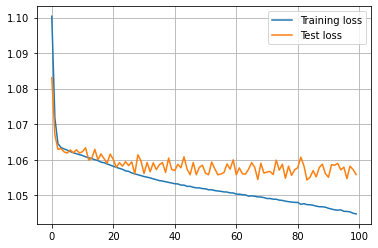

In [51]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

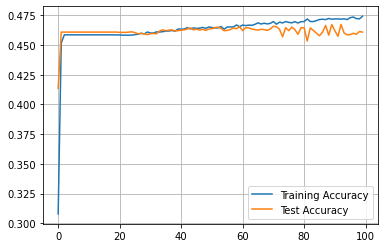

In [52]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [53]:
#saving the model

MODEL_PATH = 'teamConmodel.pth'
torch.save(net, MODEL_PATH)

In [54]:
net = torch.load(MODEL_PATH)

In [55]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = net(Team_Test1)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.37      0.20      0.26      1189
        Draw       0.00      0.00      0.00      1102
         Win       0.48      0.88      0.62      1959

    accuracy                           0.46      4250
   macro avg       0.28      0.36      0.29      4250
weighted avg       0.32      0.46      0.36      4250



Text(0.5, 15.0, 'Predicted label')

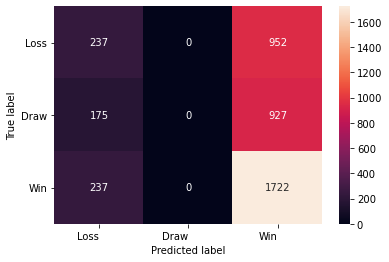

In [56]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [57]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x, y) in enumerate(test_loader1):
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 46 %


In [1]:
Team_Train

NameError: name 'Team_Train' is not defined